<img src="imagens/Boas vindas.png">

# Sumário

1) Eliminação de Valores Inválidos

2) Outliers

3) Boxplot

4) Distribuições

5) Normalização e Transformação de Variáveis

<img src="imagens/3.png">

# 1. Eliminação de Valores Inválidos

A eliminação de valores inválidos é uma etapa importante no pré-processamento de dados para muitas tarefas de machine learning. 

Dados incompletos, inconsistentes ou inválidos podem afetar negativamente a precisão dos modelos de machine learning.

In [1]:
# Bibliotecas utilizadas nesta aula

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
import os
from scipy.special import gamma
import warnings
warnings.filterwarnings('ignore')

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (15,5),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20}

In [3]:
data1 = {'Nome': ['João', 'Ana Maria', 'Pedro', 'Julia', 'Lucas'],
        'Idade': [20, 25, np.nan, 30, 40],
        'Sexo': ['M', 'F', 'M', np.nan, 'M'],
        'Altura': [1.70, 1.60, 1.80, np.nan, 1.75],
        'Peso': [70, 60, np.nan, 65, 80],
        'Salario': [3000, np.nan, 2500, 3500, 4000]}

df = pd.DataFrame(data1)

In [4]:
print(df)

        Nome  Idade Sexo  Altura  Peso  Salario
0       João   20.0    M    1.70  70.0   3000.0
1  Ana Maria   25.0    F    1.60  60.0      NaN
2      Pedro    NaN    M    1.80   NaN   2500.0
3      Julia   30.0  NaN     NaN  65.0   3500.0
4      Lucas   40.0    M    1.75  80.0   4000.0


**Neste exemplo, temos um DataFrame com informações sobre algumas pessoas, onde alguns valores estão faltando ou são inválidos.**

*Vamos agora criar funções para lidar com esses valores.*

## 1.1. Eliminando linhas ou colunas que contêm valores inválidos

A primeira estratégia que vamos implementar é a eliminação de linhas ou colunas que contêm valores inválidos. 

Para isso, podemos usar o método `dropna()` do Pandas.

In [5]:
"""
Remove as linhas ou colunas que contêm valores inválidos

Parâmetros:
    df (DataFrame): DataFrame com os dados
    axis (int): 0 (padrão) para remover as linhas, 1 para remover as colunas

Retorno:
    DataFrame: DataFrame sem as linhas ou colunas com valores inválidos
"""

def drop_invalid_values(df, axis = 0):

    return df.dropna(axis = axis)

In [6]:
print(drop_invalid_values(df))

    Nome  Idade Sexo  Altura  Peso  Salario
0   João   20.0    M    1.70  70.0   3000.0
4  Lucas   40.0    M    1.75  80.0   4000.0


**A função acima recebe um `DataFrame` e um parâmetro `axis` indicando se queremos remover linhas (valor padrão) ou colunas com valores inválidos. O método `dropna()` retorna um novo `DataFrame` sem as linhas ou colunas com valores inválidos.**

## 1.2. Substituindo valores inválidos

A segunda estratégia que vamos implementar é a substituição de valores inválidos. Para isso, podemos usar o método `fillna()` do Pandas

In [7]:
"""
Substitui os valores inválidos por outros valores
    
Parâmetros:
    
    df (DataFrame): DataFrame com os dados
    
    method (str): Método de substituição (padrão = 'mean')
        - 'mean': substitui por a média da coluna
        - 'median': substitui por a mediana da coluna
        - 'mode': substitui por a moda da coluna
        - 'zero': substitui por zero
        - 'custom': substitui por um valor personalizado especificado no parâmetro 'custom_value'
        - 'ffill': substitui pelo valor anterior (forward fill)
        - 'bfill': substitui pelo valor seguinte  (backward fill)
    
Retorno:
    DataFrame: DataFrame com os valores inválidos substituídos
"""

"\nSubstitui os valores inválidos por outros valores\n    \nParâmetros:\n    \n    df (DataFrame): DataFrame com os dados\n    \n    method (str): Método de substituição (padrão = 'mean')\n        - 'mean': substitui por a média da coluna\n        - 'median': substitui por a mediana da coluna\n        - 'mode': substitui por a moda da coluna\n        - 'zero': substitui por zero\n        - 'custom': substitui por um valor personalizado especificado no parâmetro 'custom_value'\n        - 'ffill': substitui pelo valor anterior (forward fill)\n        - 'bfill': substitui pelo valor seguinte (backward fill)\n    \nRetorno:\n    DataFrame: DataFrame com os valores inválidos substituídos\n"

In [8]:
def replace_invalid_values(df, method = 'mean'):

    if method == 'mean':
        return df.fillna(df.mean())
    elif method == 'median':
        return df.fillna(df.median())
    elif method == 'mode':
        return df.fillna(df.mode().iloc[0])
    elif method == 'zero':
        return df.fillna(0)
    elif method == 'custom':
        custom_value = input("Insira um valor personalizado para substituir os valores inválidos: ")
        return df.fillna(custom_value)
    elif method == 'ffill':
        return df.fillna(method = 'ffill')
    elif method == 'bfill':
        return df.fillna(method = 'bfill')
    else:
        return df

In [9]:
print(replace_invalid_values(df, 'mode'))

        Nome  Idade Sexo  Altura  Peso  Salario
0       João   20.0    M    1.70  70.0   3000.0
1  Ana Maria   25.0    F    1.60  60.0   2500.0
2      Pedro   20.0    M    1.80  60.0   2500.0
3      Julia   30.0    M    1.60  65.0   3500.0
4      Lucas   40.0    M    1.75  80.0   4000.0


**A função acima recebe um DataFrame e um parâmetro `method` indicando qual método de substituição de valores inválidos deve ser utilizado. As opções disponíveis são: substituição pela média (`mean`), mediana (`median`), moda (`mode`), zero (`zero`), um valor personalizado (`custom`) especificado pelo usuário, valor anterior (`ffill`) ou valor seguinte (`bfill`).**

**Se o método escolhido for substituição por valor personalizado (`custom`), a função solicita ao usuário que insira um valor para ser usado como substituto. Caso contrário, a função aplica o método escolhido usando o método `fillna()` do Pandas.**

## 1.3. Tratamento de valores inválidos como uma categoria separada

Por fim, vamos implementar a estratégia de tratamento de valores inválidos como uma categoria separada. Para isso, podemos usar o método `fillna()` do Pandas e atribuir um valor específico para os valores inválidos.

In [10]:
"""
Trata os valores inválidos como uma categoria separada
    
Parâmetros:
    
    df (DataFrame): DataFrame com os dados
    
    category (str): Categoria a ser usada para valores inválidos (padrão='Desconhecido')
    
Retorno:
    DataFrame: DataFrame com os valores inválidos substituídos pela categoria especificada
"""

def treat_invalid_values_as_category(df, category = 'Desconhecido'):
    
    return df.fillna(category)

In [11]:
print(treat_invalid_values_as_category(df, 'inválido'))

        Nome     Idade      Sexo    Altura      Peso   Salario
0       João      20.0         M       1.7      70.0    3000.0
1  Ana Maria      25.0         F       1.6      60.0  inválido
2      Pedro  inválido         M       1.8  inválido    2500.0
3      Julia      30.0  inválido  inválido      65.0    3500.0
4      Lucas      40.0         M      1.75      80.0    4000.0


**A função acima recebe um DataFrame e um parâmetro category indicando qual categoria deve ser usada para substituir os valores inválidos. A função então usa o método `fillna()` do Pandas para substituir os valores inválidos pela categoria especificada.**

# 2. Análise de Outliers

### Análise de outliers é um importante conceito em aprendizado de máquina que pode ajudar a melhorar a qualidade dos dados

Um outlier é um ponto de dados que se afasta significativamente dos outros pontos em um conjunto de dados.

In [12]:
# Criando um conjunto de dados com valores aleatórios entre 0 e 50
np.random.seed(42)
data = np.random.rand(100) * 50

# Imprimindo os dados antes de introduzir os outliers
print("Dados originais:\n", data)

Dados originais:
 [18.72700594 47.53571532 36.59969709 29.93292421  7.80093202  7.79972602
  2.90418061 43.30880729 30.05575059 35.40362889  1.02922471 48.49549261
 41.62213204 10.61695553  9.09124836  9.17022549 15.21211215 26.23782158
 21.59725093 14.56145701 30.59264474  6.97469303 14.60723243 18.31809216
 22.80349921 39.25879807  9.98368911 25.71172192 29.62072844  2.32252064
 30.3772426   8.52620618  3.25257965 47.44427686 48.28160165 40.41986741
 15.23068846  4.8836057  34.21165133 22.00762469  6.10191174 24.75884551
  1.71942606 45.4660201  12.93899908 33.12611422 15.5855538  26.00340106
 27.33551397  9.24272278 48.47923139 38.75664117 46.97494708 44.74136752
 29.89499894 46.09371175  4.4246251   9.79914312  2.26136445 16.26651654
 19.43386448 13.56745159 41.43687546 17.83766633 14.04672548 27.13480416
  7.04621125 40.10984904  3.72753218 49.34434683 38.61223846  9.93578408
  0.27610586 40.77307142 35.34286719 36.4503584  38.56351733  3.70223259
 17.92328643  5.79345298 43.15517

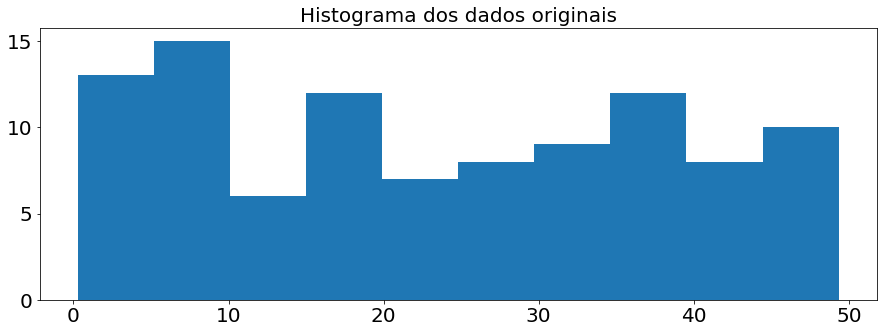

In [13]:
pylab.rcParams.update(params)
# Histograma dos dados originais
plt.hist(data, bins = 10)
plt.title("Histograma dos dados originais")
plt.show()

In [14]:
# Introduzindo outliers no conjunto de dados
data[20] = 200  # Outlier grande usando métodos baseados em distância
data[30] = 100  # Outlier médio usando métodos estatísticos
data[80] = 5    # Outlier pequeno usando abordagens baseadas em modelo

# Imprimindo os dados depois de introduzir os outliers
print("Dados originais:\n", data)

Dados originais:
 [ 18.72700594  47.53571532  36.59969709  29.93292421   7.80093202
   7.79972602   2.90418061  43.30880729  30.05575059  35.40362889
   1.02922471  48.49549261  41.62213204  10.61695553   9.09124836
   9.17022549  15.21211215  26.23782158  21.59725093  14.56145701
 200.           6.97469303  14.60723243  18.31809216  22.80349921
  39.25879807   9.98368911  25.71172192  29.62072844   2.32252064
 100.           8.52620618   3.25257965  47.44427686  48.28160165
  40.41986741  15.23068846   4.8836057   34.21165133  22.00762469
   6.10191174  24.75884551   1.71942606  45.4660201   12.93899908
  33.12611422  15.5855538   26.00340106  27.33551397   9.24272278
  48.47923139  38.75664117  46.97494708  44.74136752  29.89499894
  46.09371175   4.4246251    9.79914312   2.26136445  16.26651654
  19.43386448  13.56745159  41.43687546  17.83766633  14.04672548
  27.13480416   7.04621125  40.10984904   3.72753218  49.34434683
  38.61223846   9.93578408   0.27610586  40.77307142  35.3

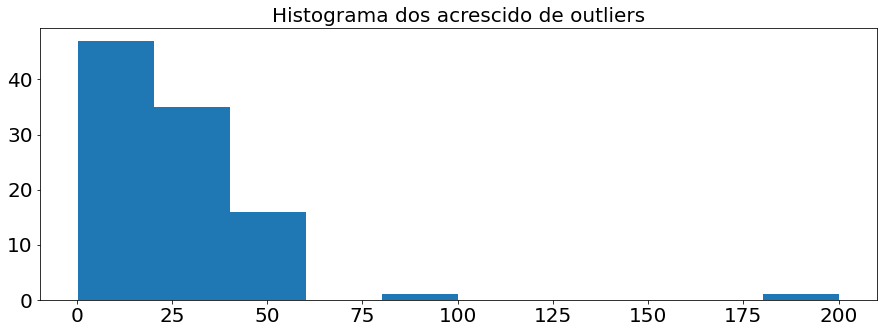

In [15]:
# Histograma dos dados acrescido de outliers
plt.hist(data, bins=10)
plt.title("Histograma dos acrescido de outliers")
plt.show()

## Z-score

A técnica de Z-score é uma medida estatística que indica a quantos desvios padrão de distância um valor está em relação à média de um conjunto de dados. Valores que estão muito longe da média, ou seja, que possuem um Z-score alto, são considerados outliers.

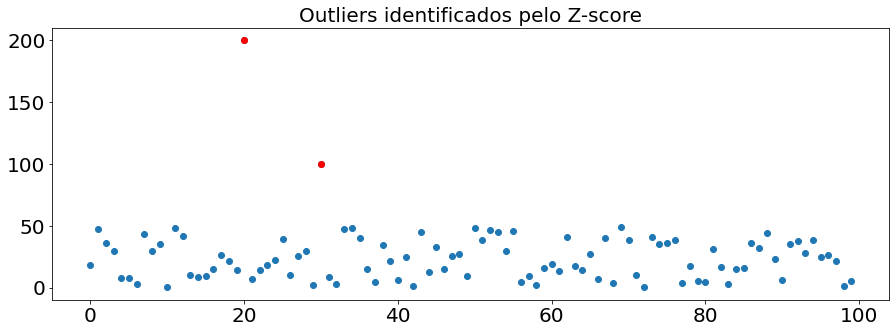

In [16]:
# Aplicando a técnica de Z-score para detecção de outliers
outliers_zscore = np.where(np.abs((data - np.mean(data)) / np.std(data)) > 3)

# Plot dos dados com os outliers identificados pelo Z-score
plt.scatter(range(len(data)), data)
plt.scatter(outliers_zscore, data[outliers_zscore], color = "red")
plt.title("Outliers identificados pelo Z-score") 
plt.show()

## Abordagem baseada em modelo - Análise de Resíduos para detectar outliers em um conjunto de dados.

Na abordagem baseada em modelo, um modelo estatístico é ajustado aos dados e, em seguida, os pontos que não se encaixam bem no modelo são considerados outliers.

In [17]:
# Aplicando a técnica de Análise de Resíduos para detecção de outliers

df = pd.DataFrame({'x': range(len(data)), 'y': data})
model = ols("y ~ x", data=df).fit()
infl = model.get_influence()
outliers_resid = infl.summary_frame().loc[infl.summary_frame()['cooks_d'] > 0.05].index.tolist()

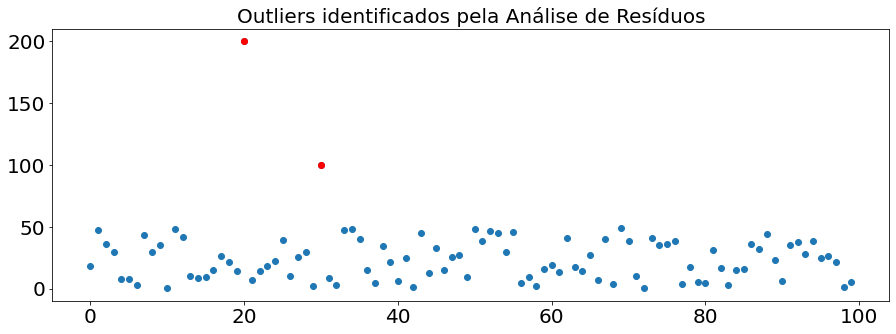

In [18]:
# Plot dos dados com os outliers identificados pela Análise de Resíduos
plt.scatter(range(len(data)), data)
plt.scatter(outliers_resid, data[outliers_resid], color = "red")
plt.title("Outliers identificados pela Análise de Resíduos")
plt.show()

Nesta versão do código, incluímos gráficos para visualizar os resultados das três técnicas de detecção de outliers que usamos:

- Um histograma dos dados originais para ver a distribuição dos valores;
- Um gráfico de dispersão que mostra todos os dados, com os outliers detectados pelo Z-score destacados em vermelho;
- Um gráfico de dispersão que mostra todos os dados, com os outliers detectados pela análise de resíduos destacados em vermelho;
- Um histograma dos dados após a substituição dos outliers pelos valores médios.

**Esses gráficos devem ajudar a entender melhor como cada técnica funciona e como os outliers são detectados. Além disso, a substituição dos outliers pelos valores médios permite que os dados sejam analisados de forma mais precisa, sem distorções causadas pelos valores extremos.**

In [19]:
# Imprimir os índices dos outliers detectados por cada técnica

print("Outliers detectados por Z-score:\n", outliers_zscore[0])
print("Outliers detectados por Análise de Resíduos:\n", outliers_resid)

Outliers detectados por Z-score:
 [20 30]
Outliers detectados por Análise de Resíduos:
 [20, 30]


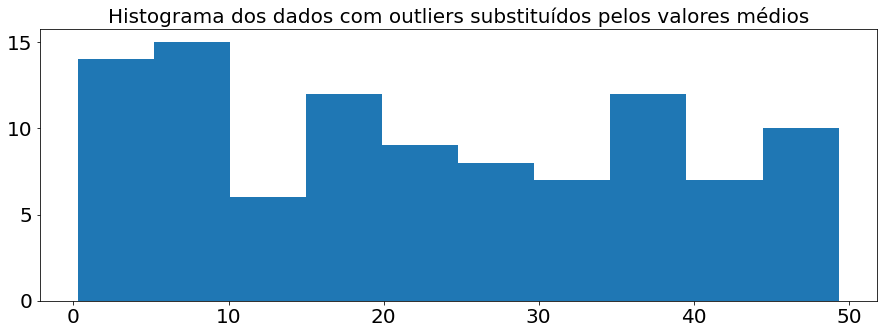

In [20]:
# Substituindo os outliers pelos valores médios dos dados

data[outliers_zscore] = np.mean(data)
data[outliers_resid] = np.mean(data)

# Histograma dos dados com os outliers substituídos pelos valores médios
plt.hist(data, bins = 10)
plt.title("Histograma dos dados com outliers substituídos pelos valores médios")
plt.show()

# 3. Boxplots

O objetivo do **boxplot** é apresentar uma **representação resumida das principais características de um conjunto de dados, como a mediana, quartis, mínimo, máximo e possíveis outliers.**

<img src="imagens/boxPlotExample.png">

**Utilizando a função `np.random.normal()` para gerar um conjunto de dados aleatórios com uma distribuição normal com média zero (`loc=0.0`) e desvio padrão um (`scale=1.0`). O conjunto de dados tem 100 elementos.**

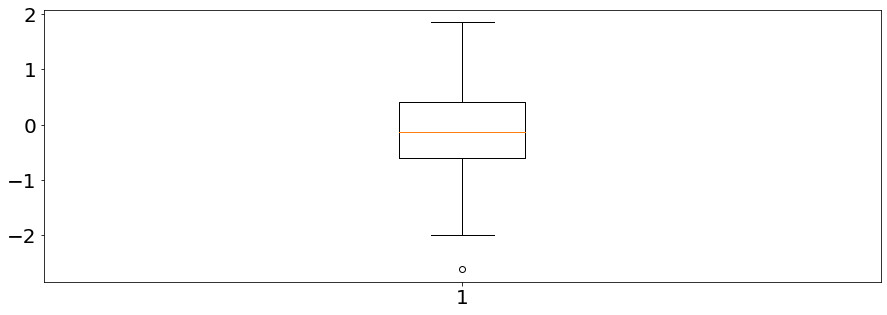

In [21]:
np.random.seed(42)
data2 = np.random.normal(loc=0.0, scale=1.0, size=100)
fig, ax = plt.subplots()
ax.boxplot(data2)
plt.show()

## Exemplo

### Criando quatro conjuntos com 200 dados aleatórios usando a biblioteca `NumPy` do Python. 

Cada conjunto de dados é gerado usando uma distribuição normal ou poisson com diferentes parâmetros.

- O primeiro conjunto de dados, dados1, é gerado usando uma distribuição **normal** com média 100 e desvio padrão 20.

- O segundo conjunto de dados, dados2, é gerado usando uma distribuição **normal** com média 80 e desvio padrão 30.

- O terceiro conjunto de dados, dados3, é gerado usando uma distribuição **normal** com média 90 e desvio padrão 10.

- O quarto conjunto de dados, dados4, é gerado usando uma distribuição **poisson** com média 70.

In [22]:
# Criando um conjunto de dados aleatórios
dados1 = np.random.normal(100, 20, 200)
dados2 = np.random.normal(80, 30, 200)
dados3 = np.random.normal(90, 10, 200)
dados4 = np.random.poisson(70, 200) # Distribuição Poisson com média 70

# Combinando os dados em um único conjunto
dados = [dados1, dados2, dados3, dados4]

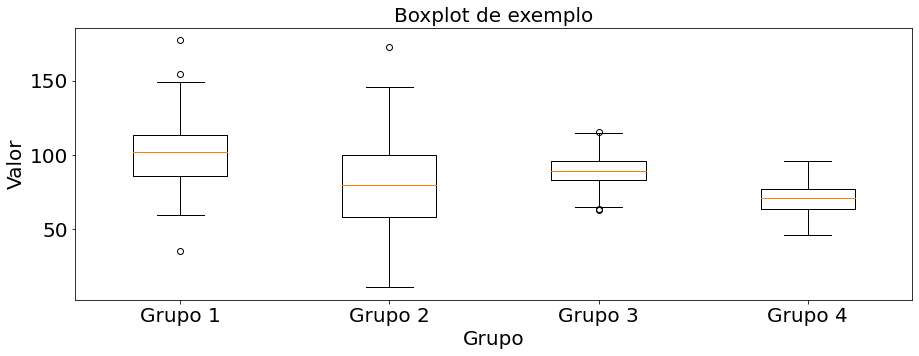

In [23]:
# Criando um boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(dados)
# Adicionando legendas e título
ax.set_title('Boxplot de exemplo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Valor')
# Adicionando rótulos para cada grupo
rótulos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
ax.set_xticklabels(rótulos)
# Mostrando o gráfico
plt.show()

In [24]:
# Criando um conjunto de dados com valores aleatórios entre 0 e 50
np.random.seed(42)
data = np.random.rand(100) * 50
# Introduzindo outliers no conjunto de dados
data[20] = 200  # Outlier grande usando métodos baseados em distância
data[30] = 100  # Outlier médio usando métodos estatísticos
data[80] = 5    # Outlier pequeno usando abordagens baseadas em modelo

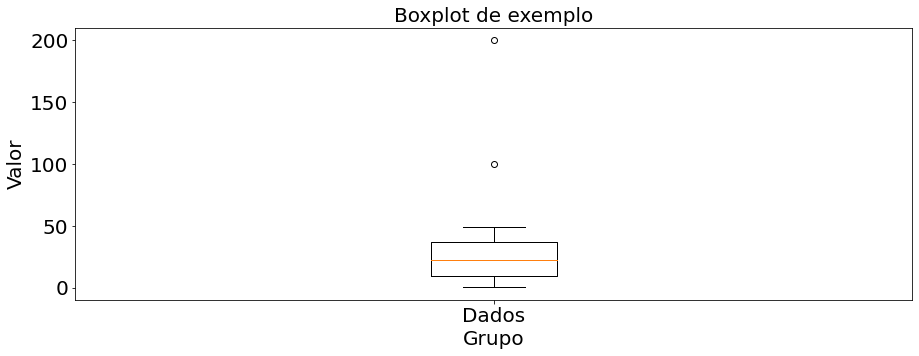

In [25]:
# Criando um boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(data)
# Adicionando legendas e título
ax.set_title('Boxplot de exemplo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Valor')
# Adicionando rótulos para cada grupo
rótulos = ['Dados']
ax.set_xticklabels(rótulos)
# Mostrando o gráfico
plt.show()

# 4. Distribuições

### As distribuições de dados referem-se à maneira como os dados estão distribuídos em relação a uma determinada variável

- **Pode ser usada para entender melhor como os dados se relacionam com essa variável e como isso pode afetar a precisão dos modelos de machine learning**

## Distribuição normal (ou Gaussiana)
**É uma das distribuições mais utilizadas para modelar dados contínuos.**

- É caracterizada por uma função de densidade de probabilidade simétrica em forma de sino
- Descreve a probabilidade de um dado valor ocorrer em um conjunto de dados

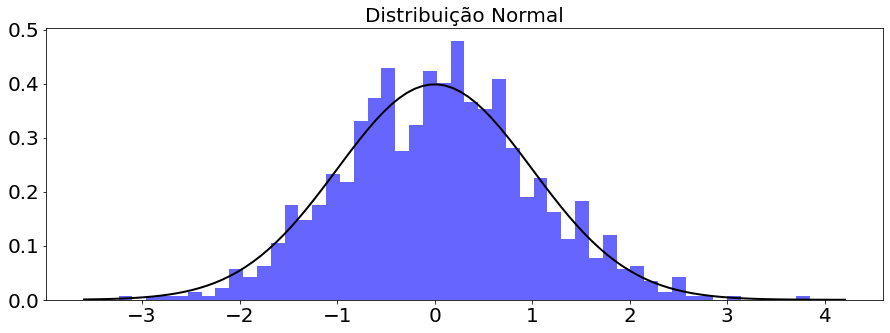

In [26]:
# Distribuição Normal
mean = 0
std = 1
data_normal = np.random.normal(mean, std, 1000)
plt.hist(data_normal, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x - mean)**2 / (2 * std**2)) / (std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Normal')
plt.show()

## Distribuição de Poisson 

**É comumente utilizada para modelar eventos raros em um espaço contínuo.** 

- É caracterizada por uma função de massa de probabilidade discreta
- Descreve a probabilidade de um determinado número de eventos ocorrer em um período de tempo ou espaço

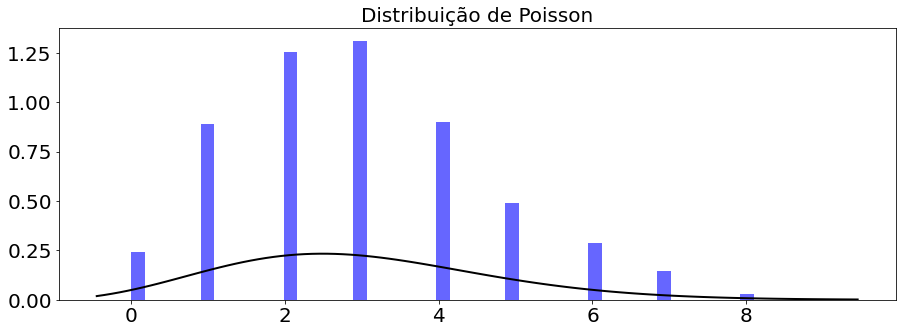

In [27]:
# Distribuição de Poisson
lam = 3
data_poisson = np.random.poisson(lam, 1000)
plt.hist(data_poisson, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-lam) * lam**x / gamma(x + 1)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição de Poisson')
plt.show()

## Distribuição Exponencial

**É frequentemente usada para modelar eventos que ocorrem em um período de tempo conhecido.** 

- Caracterizada por uma função de densidade de probabilidade contínua 
- Descreve a probabilidade de um evento ocorrer em um determinado intervalo de tempo

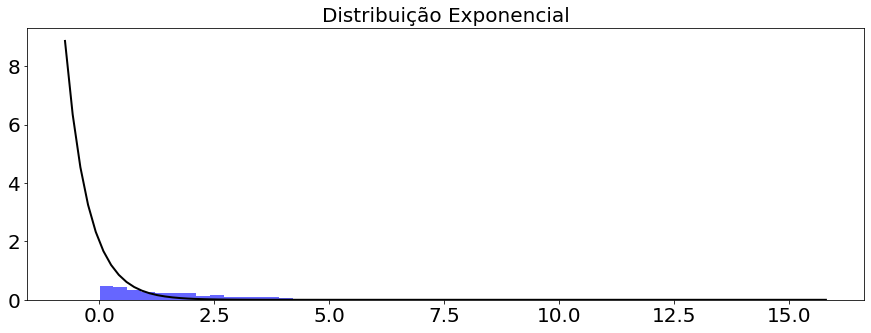

In [28]:
# Distribuição Exponencial
beta = 2
data_exponential = np.random.exponential(beta, 1000)
plt.hist(data_exponential, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta * np.exp(-beta * x)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Exponencial')
plt.show()

## Distribuição Uniforme
**É frequentemente usada em simulações e modelagem de probabilidade, especialmente em situações em que não há informações adicionais disponíveis sobre a distribuição dos dados**

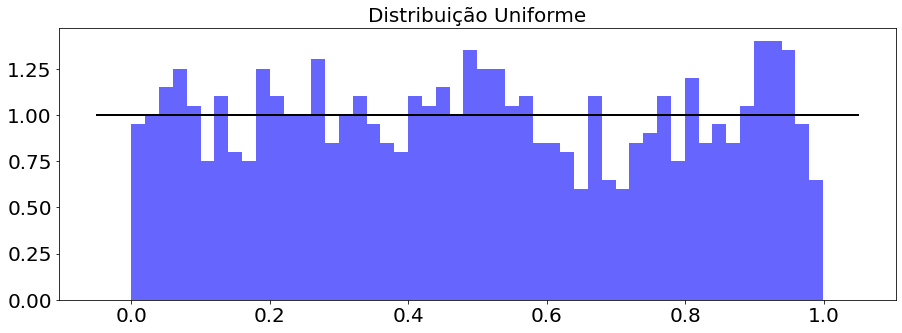

In [29]:
# Distribuição Uniforme
a = 0
b = 1
data_uniform = np.random.uniform(a, b, 1000)
plt.hist(data_uniform, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.ones_like(x) / (b - a)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Uniforme')
plt.show()

<img src="imagens/FIG3.jpeg" style="width:800px; height:600px; margin:auto" >

<img src="imagens/boxplotDistri.jpg" style = "width:1000px; height:600px; margin:auto">

 # 5. Normalização e Transformação de Variáveis 

## Motivação

In [30]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
x1 = np.random.normal(4, 2.5, size = (1, 100))

x2 = np.random.normal(2, 0.7, size = (1, 100))

x3 = np.random.normal(5, 1.8, size = (1, 100))

Considere um banco de dados sem passar por nenhuma etapa de pré-processamento:

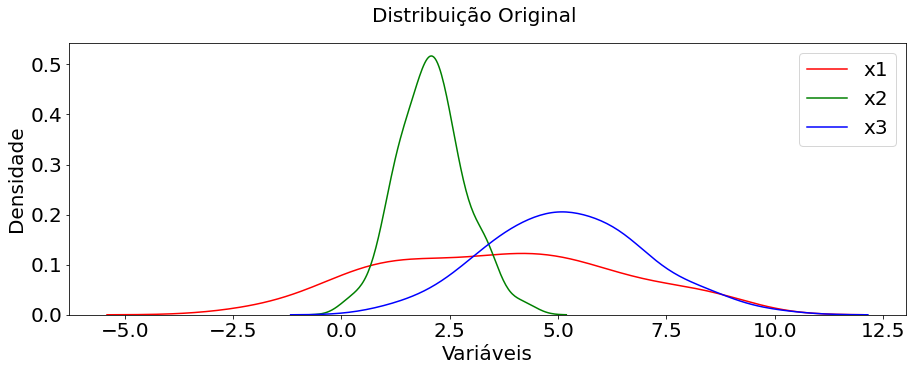

In [34]:
pylab.rcParams.update(params)
sns.distplot(x1, hist = False, kde = True, color = 'red', label = 'x1')
sns.distplot(x2, hist = False, kde = True, color = 'green', label = 'x2')
sns.distplot(x3, hist = False, kde = True, color = 'blue', label = 'x3')
plt.legend(fontsize = 20)
plt.ylabel("Densidade")
plt.xlabel("Variáveis")
plt.suptitle('Distribuição Original', size = 20)
plt.show()

In [35]:
x1_nor = (x1 - np.mean(x1))/np.std(x1)

x2_nor = (x2 - np.mean(x2))/np.std(x2)

x3_nor = (x3 - np.mean(x3))/np.std(x3)

Agora, considere que realizaremos uma transformação nestes dados brutos. Realizaremos uma transformação nestes dados brutos:

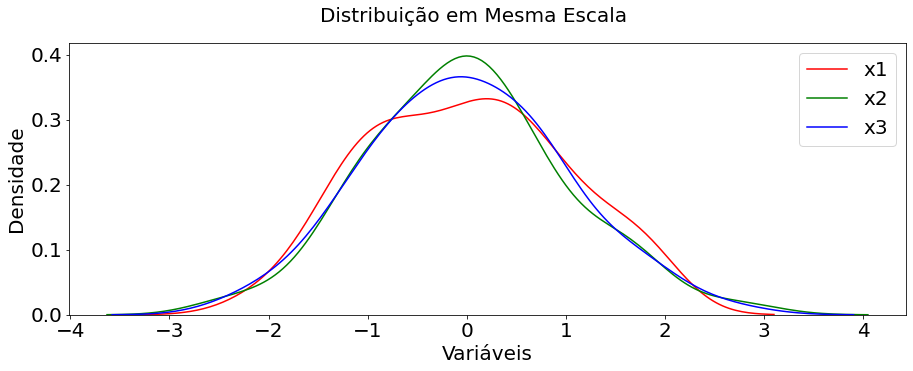

In [36]:
pylab.rcParams.update(params)
sns.distplot(x1_nor, hist = False, kde = True, color = 'red', label = 'x1')
sns.distplot(x2_nor, hist = False, kde = True, color = 'green', label = 'x2')
sns.distplot(x3_nor, hist = False, kde = True, color = 'blue', label = 'x3')
plt.legend(fontsize = 20)
plt.ylabel("Densidade")
plt.xlabel("Variáveis")
plt.suptitle('Distribuição em Mesma Escala', size = 20)
plt.show()

## Por que Normalizar?

O objetivo é deixar os dados na mesma escala, de forma que o desempenho do modelo de *machine learning* não sofra com viés.

O viés (*bias*) é uma tendência que pode ocorrer no sistema de tomada de decisão em que ele é influenciado por uma "força externa" que influencia na decisão.

### Exemplo

Imagine um sistema de tomada de decisão que atribui um novo padrão à uma classe por meio de uma distância matemática.

<img src="imagens/knn.png" style = "width:600px; height:400px; margin:auto">

In [37]:
pessoas = {'Nome': {0: 'Flávio',
                    1: 'Jaqueline',
                    2: 'Ana',
                    3: 'Lúcio',
                    4: 'Joana'},
           'Sexo': {0: 'M',
                    1: 'F',
                    2: 'F',
                    3: 'M',
                    4: 'F'},
           'Altura': {0: 1.72,
                      1: 1.73,
                      2: 1.65,
                      3: 1.70,
                      4: 1.62},
           'Salário': {0: 2500.00,
                       1: 5800.00,
                       2: 5700.00,
                       3: 3000.00,
                       4: 3200.00
                      }
}

In [38]:
df = pd.DataFrame(pessoas)
print(df)

        Nome Sexo  Altura  Salário
0     Flávio    M    1.72  2500.00
1  Jaqueline    F    1.73  5800.00
2        Ana    F    1.65  5700.00
3      Lúcio    M    1.70  3000.00
4      Joana    F    1.62  3200.00


### Calculo da Distância Euclidiana dos Valores Brutos

In [39]:
# Sistema de Tomada de Decisão Baseado em Distancia Euclidiana sem Normalização dos Dados

distancia_1 = np.sqrt((df['Salário'][1] - df['Salário'][4])**2 + (df['Altura'][1] - df['Altura'][4])**2)
distancia_2 = np.sqrt((df['Salário'][1] - df['Salário'][0])**2 + (df['Altura'][1] - df['Altura'][0])**2)

print("Distância entre os padrões Jaqueline e Joana:", round(distancia_1))
print("Distância entre os padrões Jaqueline e Flávio:", round(distancia_2))

Distância entre os padrões Jaqueline e Joana: 2600
Distância entre os padrões Jaqueline e Flávio: 3300


Considerando que estamos trabalhando hipotéticamente com um sistema de decisão baseado na menor distância entre os padrões, **o algoritmo atribuiria o padrão Joana à mesma classe do padrão Jaqueline**.

### Vamos colocar os valores na mesma escala

In [40]:
df.iloc[:,2:] = df.iloc[:,2:].apply(lambda x: (x - x.mean()) / x.std(), axis = 0)

print(df)

        Nome Sexo  Altura  Salário
0     Flávio    M    0.76    -0.97
1  Jaqueline    F    0.97     1.11
2        Ana    F   -0.72     1.05
3      Lúcio    M    0.34    -0.66
4      Joana    F   -1.36    -0.53


### Vamos recalcular a Distância Euclidiana

In [41]:
distancia_1_escala = np.sqrt((df['Salário'][1] - df['Salário'][4])**2 + (df['Altura'][1] - df['Altura'][4])**2)
distancia_2_escala = np.sqrt((df['Salário'][1] - df['Salário'][0])**2 + (df['Altura'][1] - df['Altura'][0])**2)

print("Distância entre os padrões Jaqueline e Joana:", round(distancia_1_escala,2))
print("Distância entre os padrões Jaqueline e Flávio:", round(distancia_2_escala,2))

Distância entre os padrões Jaqueline e Joana: 2.85
Distância entre os padrões Jaqueline e Flávio: 2.1


Após deixarmos os dados na mesma escala, o algoritmo passa a atribuir o padrão Flávio à mesma classe do padrão Jaqueline. O que mostra que o **pré processamento pode influenciar diretamente no resultado de um processo de classificação** e, consequentemente, na eficiência do sistema empregado.

## Definição

Normalização é uma técnica para **redimensionar** os dados. Os valores são deslocados e redimensionados para fiquem uma escala semelhante.


Algumas técnicas comuns de normalização:

* Escalonamento para Um Intervalo (*Scaling to Range*)
* Z-Score (Padronização)
* *Log Scaling*

## 5.1 Escalonamento Linear (*Scaling to Range*)

Se trata de redimensionar valores dos atributos do intervalo natural para um intervalo padrão, geralmente definido entre 0 e 1.

$$
x' = \frac{x - x_{MIN}}{x_{MAX} - x_{MIN}}
$$

Onde $x_{MAX}$ e $x_{MIN}$ são os valores máximo e mínimo dos dados em questão, respectivamente.

Este tipo de normalização é bastante útil quando:

* Os limites superior e inferior dos atributos são conhecidos, com poucos ou nenhum *outlier* no conjunto de dados.

* Os dados estão distrubuidos de maneira aproximadamente uniforme no intervalo em análise.

### Exemplo

Vamos voltar aos dados originais:

In [42]:
df2 = pd.DataFrame(pessoas)
print(df2)

        Nome Sexo  Altura  Salário
0     Flávio    M    1.72  2500.00
1  Jaqueline    F    1.73  5800.00
2        Ana    F    1.65  5700.00
3      Lúcio    M    1.70  3000.00
4      Joana    F    1.62  3200.00


Vamos analisar alguns dados estatísticos dos nossos dados originais:

In [44]:
print("O valor máximo de salário original:",round(df2['Salário'].max(),2))
print("O valor minimo de salário original:",round(df2['Salário'].min(),2))
print("A média de salário original:",round(df2['Salário'].mean(),2))
print("A mediana de salário original:",round(df2['Salário'].median(),2))
print("O desvio padrão de salário original:",round(df2['Salário'].std(),2))

print("\nO valor máximo de altura original:",round(df2['Altura'].max(),2))
print("O valor minimo de altura original:",round(df2['Altura'].min(),2))
print("A média de altura original:",round(df2['Altura'].mean(),2))
print("A mediana de altura original:",round(df2['Altura'].median(),2))
print("O desvio padrão de altura original:",round(df2['Altura'].std(),2))

O valor máximo de salário original: 5800.0
O valor minimo de salário original: 2500.0
A média de salário original: 4040.0
A mediana de salário original: 3200.0
O desvio padrão de salário original: 1582.09

O valor máximo de altura original: 1.73
O valor minimo de altura original: 1.62
A média de altura original: 1.68
A mediana de altura original: 1.7
O desvio padrão de altura original: 0.05


Agora, vamos normalizar os dados utilizando o **Escalonamento Linear**

In [45]:
df2.iloc[:,2:] = df2.iloc[:,2:].apply(lambda x: (x - x.min())/(x.max() - x.min()), axis = 0)

print(df2)

        Nome Sexo  Altura  Salário
0     Flávio    M    0.91     0.00
1  Jaqueline    F    1.00     1.00
2        Ana    F    0.27     0.97
3      Lúcio    M    0.73     0.15
4      Joana    F    0.00     0.21


Os dados estatísticos após o processo de normalização:

In [46]:
print("O valor máximo de salário normalizado:",round(df2['Salário'].max(),2))
print("O valor minimo de salário normalizado:",round(df2['Salário'].min(),2))
print("A média de salário normalizado:",round(df2['Salário'].mean(),2))
print("A mediana de salário normalizado:",round(df2['Salário'].median(),2))
print("O desvio padrão de salário normalizado:",round(df2['Salário'].std(),2))

print("\nO valor máximo de altura normalizado:",round(df2['Altura'].max(),2))
print("O valor minimo de altura normalizado:",round(df2['Altura'].min(),2))
print("A média de altura normalizado:",round(df2['Altura'].mean(),2))
print("A mediana de altura normalizado:",round(df2['Altura'].median(),2))
print("O desvio padrão de altura normalizado:",round(df2['Altura'].std(),2))

O valor máximo de salário normalizado: 1.0
O valor minimo de salário normalizado: 0.0
A média de salário normalizado: 0.47
A mediana de salário normalizado: 0.21
O desvio padrão de salário normalizado: 0.48

O valor máximo de altura normalizado: 1.0
O valor minimo de altura normalizado: 0.0
A média de altura normalizado: 0.58
A mediana de altura normalizado: 0.73
O desvio padrão de altura normalizado: 0.43


### Podemos concluir que:

* Por maior que seja a disparidade entre as colunas em termos de valores, elas agora se encontram na mesma escala;
* A normalização é útil para tratar de problemas envolvendo atributos que cobrem intervalos diferentes;
* O sistema de tomada de decisão, agora, não é influenciado diretamente apenas por grandezas envolvidas que apresentem maior magnitude.

## 5.2 Z-Score

Z-score é uma variação do escalonamento que representa o quanto os dados desviam em torno da média. O z-score é utilizado para garantir que as distribuições de atributos tenham média $0$ e desvio padrão igual a $1$.

$$
x' = \frac{(x - \mu)}{\sigma}
$$

Onde:
* $x$ é o padrão em análise
* $\mu$ é o valor da média do conjunto de dados
* $\sigma$ é o valor do desvio padrão dos dados

In [47]:
df = pd.DataFrame(pessoas)
print(df)

        Nome Sexo  Altura  Salário
0     Flávio    M    1.72  2500.00
1  Jaqueline    F    1.73  5800.00
2        Ana    F    1.65  5700.00
3      Lúcio    M    1.70  3000.00
4      Joana    F    1.62  3200.00


Vamos analisar estatisticamente o banco de dados de acordo com os dados originais:

In [48]:
print("A média de salário original:",round(df['Salário'].mean(),2))
print("O desvio padrão de salário original:",round(df['Salário'].std(),2))

A média de salário original: 4040.0
O desvio padrão de salário original: 1582.09


Normalizando o banco de dados aplicando o z-score, temos:

In [49]:
df.iloc[:,2:] = df.iloc[:,2:].apply(lambda x: (x - x.mean()) / x.std(), axis = 0)

print(df)

        Nome Sexo  Altura  Salário
0     Flávio    M    0.76    -0.97
1  Jaqueline    F    0.97     1.11
2        Ana    F   -0.72     1.05
3      Lúcio    M    0.34    -0.66
4      Joana    F   -1.36    -0.53


Agora, vamos analisar estatisticamente os dados após a padronização:

In [50]:
print("A média de salário original:",round(df['Salário'].mean(),2))
print("O desvio padrão de salário original:",round(df['Salário'].std(),2))

A média de salário original: -0.0
O desvio padrão de salário original: 1.0


### Podemos concluir que:

* Conforme a teoria, os valores de média e desvio padrão são recalculados para $0$ e $1$, respectivamente;
* Caso a média apareça redefinda como "$-0$", isso está relacionado diretamente a um **erro numérico** que pode ocorrer. Por vezes, o código reestrutura os dados com valores considerados em um grande número de casas decimais onde pode aparecer um pequeno resíduo que é considerado no cálculo. Por isso, o valor pode aparecer como negativo, embora este fato não faça efeito direto no processo.

## 5.3 *Log Scaling*

Este método calcula o logaritmo dos valores para compactar um intervalo amplo para um intervalo estreito.

$$
x' = log(x)
$$

Essa distribuição de dados é útil quando alguns atributos aparecem um grande número de vezes, enquanto outros aparecem poucas vezes.

### Exemplo

Vamos considerar o banco de dados nomeado **Boston**, disponível na biblioteca *ScikitLearn*.

Este *dataset* contém informações recolhidas pelo Serviço de Censos dos EUA relativas à habitação na área de Boston, no estado Massachusetts. Foi obtida do arquivo StatLib (http://lib.stat.cmu.edu/datasets/boston), e tem sido amplamente utilizada em toda a literatura para a aferição de algoritmos.

In [51]:
# Importando o banco de dados
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [52]:
# Acessando a descrição do banco de dados

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)

df['MEDV'] = boston.target

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Primeiro, para irmos ao exemplo, vamos definir a uma grandeza chamada **correlação**.

**Definição**: A correlação é a medida da relação linear de um par de variáveis.

É medida através do Coeficiente de Pearson, dado por:

$$
r_{x,y} = \frac{\sum^{n}_{1}(x_{i} - \bar{x})(y_{i} - \bar{y})}{(n - 1)s_{x}s_{y}}
$$

onde:
* $x$ e $y$ são dados associados à duas variáveis $X$ e $Y$;
* $\bar{x}$ e $\bar{y}$ são médias amostrais de $X$ e $Y$;
* $s_{x}$ e $s_{y}$ são os desvios padrão amostrais de $X$ e $Y$.

$r$ sempre estará entre os seguintes valores:

* $r = - 1 \rightarrow$ correlação linear perfeita e negativa;
* $r = 0 \rightarrow$ não existe correlação entre as variáveis;
* $r = 1 \rightarrow$ correlação linear perfeita e positiva.

<img src="imagens/correlacao.png">

Vamos verificar a correlação entre as variáveis do banco de dados.

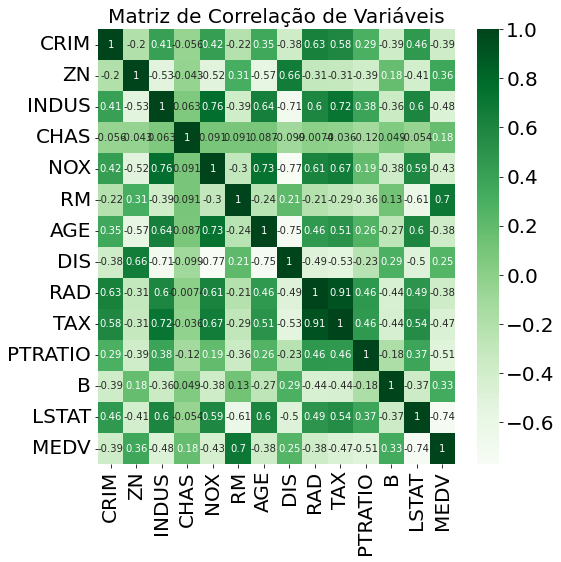

In [54]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens');
plt.title("Matriz de Correlação de Variáveis")
plt.show()

Podemos ver que algumas variáveis possuem alta correlação positiva e, outras possuem alta correlação negativa, com a coluna "MEDV", que corresponde ao *target* do banco de dados. Vamos então selecionar as variáveis que possuem alta correlação para uma análise mais detalhada. São elas:
* LSTAT $\rightarrow -0.74$ 
* RM $\rightarrow 0.7$
* PTRATIO $\rightarrow -0.51$
* INDUS $\rightarrow -0.48$

In [55]:
variaveis = ['LSTAT','RM','PTRATIO','INDUS']

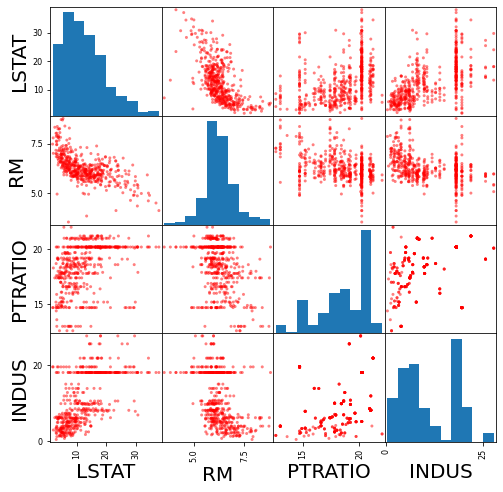

In [56]:
pd.plotting.scatter_matrix(df[variaveis], figsize = (8,8), color = 'red')
plt.show()

Vamos selecionar agora as colunas que possuem a característica de variáveis com distribuição log-normal. É uma característica desta distribuição que a o histograma tenha uma concentração de dados mais à esquerda, como neste exemplo **independente do banco de dados**:

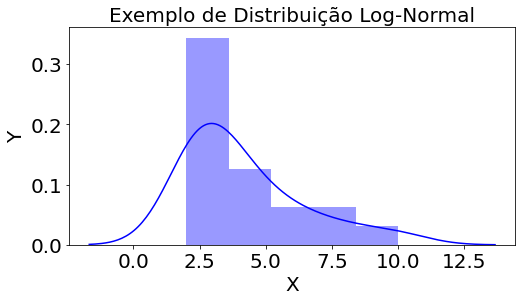

In [57]:
# Criando um conjunto de dados aleatório

df3 = np.linspace(0.1,0.5,20)
df3 = df3 ** -1.0

plt.figure(figsize = (8,4))
sns.distplot(df3, hist = True, kde = True, color = 'blue')
plt.title("Exemplo de Distribuição Log-Normal")
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

Voltando ao banco de dados que estamos analisando:

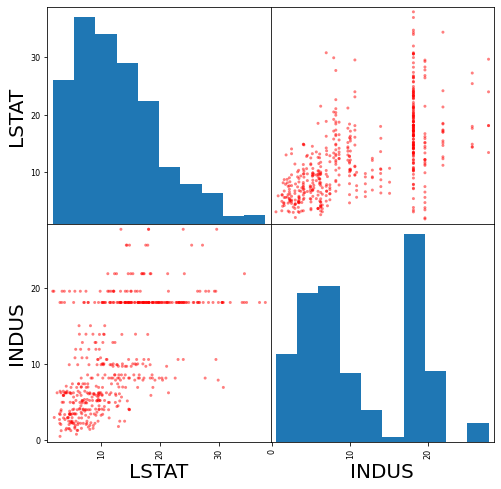

In [58]:
variaveis_selecionadas = ['LSTAT','INDUS']

pd.plotting.scatter_matrix(df[variaveis_selecionadas], figsize = (8,8), color = 'red')
plt.show()

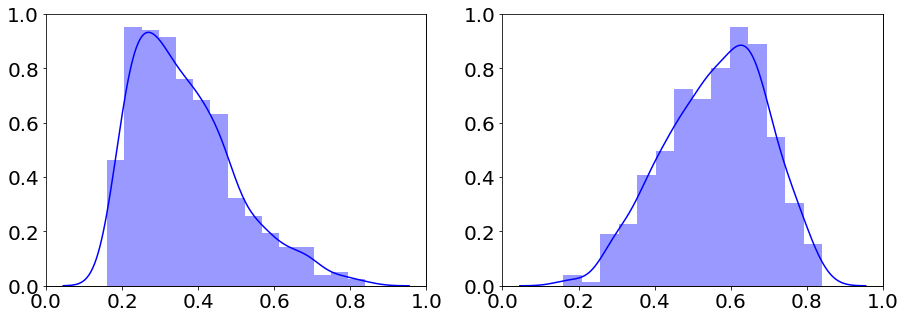

In [59]:
# Realizando a Transformação Logaritmica

fig, ax = plt.subplots(1,2)

fig.add_subplot(1,2,1)
plt.xticks([])
plt.yticks([])
sns.distplot(df['LSTAT'], hist = True, kde = True, color = 'blue')
plt.ylabel("Densidade")
fig.add_subplot(1,2,2)
plt.xticks([])
plt.yticks([])
sns.distplot(np.log(df['LSTAT']), hist = True, kde = True, color = 'blue')
plt.ylabel("Densidade")
plt.show()

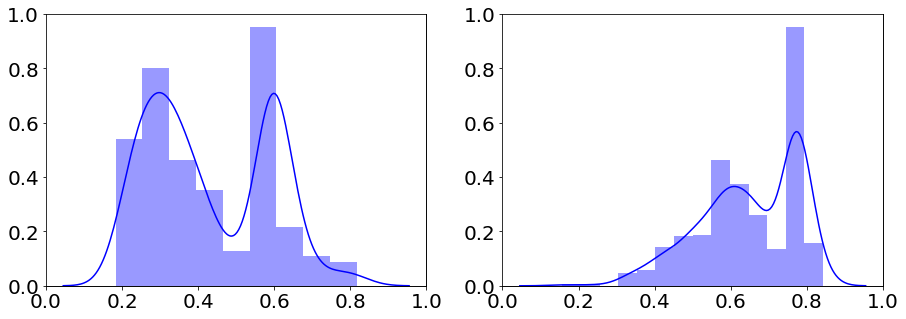

In [60]:
# Realizando a Transformação Logaritmica

fig, ax = plt.subplots(1,2)

fig.add_subplot(1,2,1)
plt.xticks([])
plt.yticks([])
sns.distplot(df['INDUS'], hist = True, kde = True, color = 'blue')
plt.ylabel("Densidade")
fig.add_subplot(1,2,2)
plt.xticks([])
plt.yticks([])
sns.distplot(np.log(df['INDUS']), hist = True, kde = True, color = 'blue')
plt.ylabel("Densidade")
plt.show()

Vamos agora comparar o efeito da normalização em termos da correlação entre as variáveis.

In [61]:
# Gerando uma coluna com os dados normalizados

df['LOG_LSTAT'] = np.log(df['LSTAT'])
df['LOG_INDUS'] = np.log(df['INDUS'])

features = ['LSTAT', 'INDUS', 'MEDV']
log_features = ['LOG_LSTAT','LOG_INDUS','MEDV']

Correlação **original** entre as colunas LSTAT e INDUS com a coluna *target*:

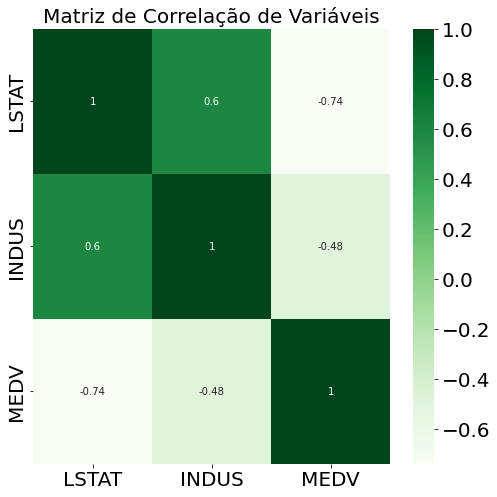

In [63]:
plt.figure(figsize = (8,8))
sns.heatmap(df[features].corr(), annot = True, cmap = 'Greens');
plt.title("Matriz de Correlação de Variáveis")
plt.show()

Correlação entre as colunas LSTAT e INDUS com a coluna *target* **após a transformação**:

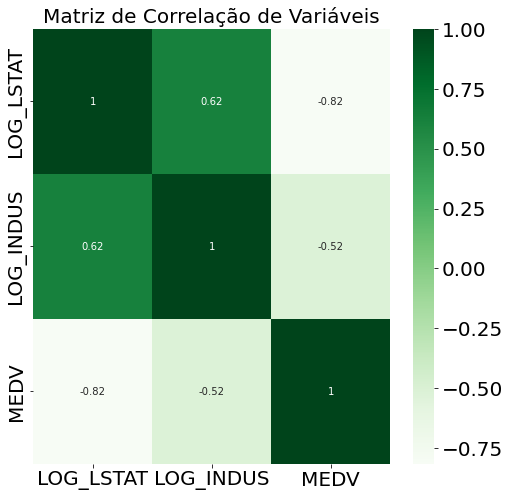

In [64]:
plt.figure(figsize = (8,8))
sns.heatmap(df[log_features].corr(), annot = True, cmap = 'Greens');
plt.title("Matriz de Correlação de Variáveis")
plt.show()

Vamos testar um modelo de Regressão Linear e comparar o desempenho deste modelo antes e após a normalização apenas como curiosidade. Para isso, vamos importar as seguintes bibliotecas:

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
# Separando os dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(df[features[:2]], df[features[2]], 
                                                       test_size = 0.2, random_state = 0)

# Criando o modelo                                                       
modelo = LinearRegression()

# Realizando o treinamento
modelo.fit(x_train,y_train)
                  
# Realizando o teste    
predicoes_originais = modelo.predict(x_test)

# Verificando a eficiencia do modelo pelo Erro Quadratico Medio
mse_original = mean_squared_error(predicoes_originais, y_test)
print("O MSE do modelo para dados originais é:", round(mse_original,2))

O MSE do modelo para dados originais é: 48.28


Vamos agora analisar os dados transformados:

In [67]:
# Separando os dados em treinamento e teste
x_trainlog, x_testlog, y_trainlog, y_testlog = train_test_split(df[log_features[:2]], df[log_features[2]], 
                                                                          test_size = 0.2, random_state = 0)

# Realizando o treinamento
modelo.fit(x_trainlog,y_trainlog)
                  
# Realizando o teste    
predicoes_log = modelo.predict(x_testlog)

# Verificando a eficiencia do modelo pelo Erro Quadratico Medio
mse_log = mean_squared_error(predicoes_log, y_testlog)
print("O MSE do modelo para dados transformados é:", round(mse_log,2))

O MSE do modelo para dados transformados é: 38.62


Podemos analisar visualmente:

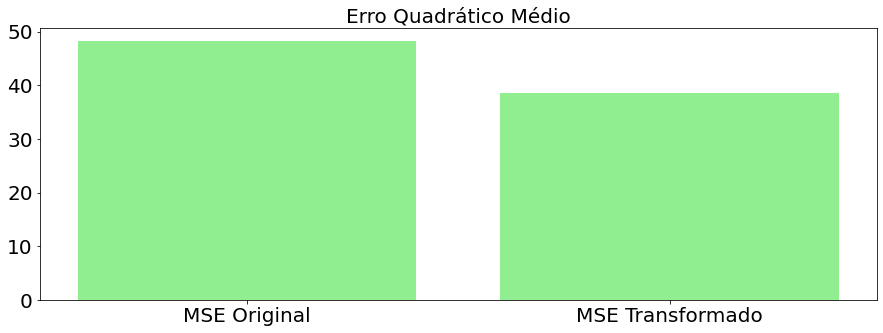

In [68]:
# Grafico comparativo de desempenho do modelo criado

plt.bar(['MSE Original', 'MSE Transformado'], [mse_original, mse_log], color = 'lightgreen')
plt.title("Erro Quadrático Médio")
plt.show()

### Podemos concluir que:

* A transformação de dados para escala logarítmica aumenta a correlação entre os dados;
* A transformação melhora o desempenho do modelo de *machine learning* empregado.

## Conclusão

<img src="imagens/tabela.png" style = "width:600px; height:300px; margin:auto">